In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('House_Rent_Dataset.csv')

In [3]:
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
# checking null values
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [5]:
# checking duplicate values
data.duplicated().sum()

0

In [6]:
# data describe
data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [7]:
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


Text(0, 0.5, 'Rent')

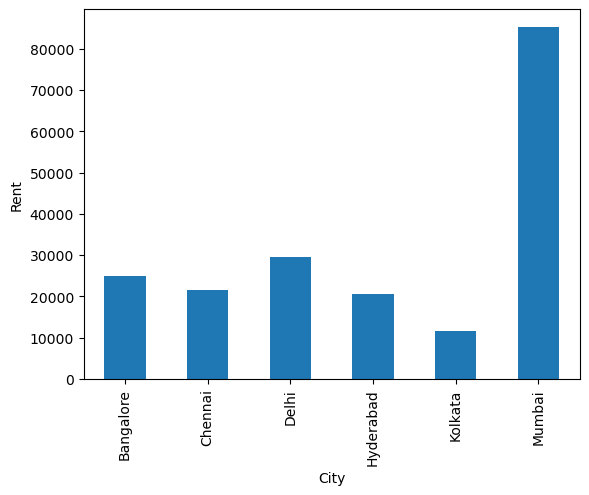

In [12]:
data.groupby('City')['Rent'].mean().plot.bar()
plt.xlabel('City')
plt.ylabel('Rent')

In [13]:
data['Area Type'].unique()

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

In [14]:
# data encoding
data['Area Type'] = data['Area Type'].map({"Super Area":1,"Carpet Area":2,"Built Area":3})

In [16]:
data["City"] = data["City"].map({"Mumbai": 1, "Chennai": 2, 
                                 "Bangalore": 3, "Hyderabad": 4, 
                                 "Delhi": 5, "Kolkata": 6})
data["Furnishing Status"] = data["Furnishing Status"].map({"Unfurnished": 1, 
                                                           "Semi-Furnished": 2, 
                                                           "Furnished": 3})
data["Tenant Preferred"] = data["Tenant Preferred"].map({"Bachelors/Family": 2, 
                                                         "Bachelors": 1, 
                                                         "Family": 3})

In [18]:
# spliting data into dependent and independent feature
X = data[['BHK','Size','Area Type','City','Furnishing Status','Tenant Preferred','Bathroom']]
y = data['Rent']

In [41]:
# train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [48]:
# scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [50]:
# model implementation
from sklearn.linear_model import LinearRegression


model = LinearRegression()

model.fit(X_train_scaled,y_train)

LinearRegression()

In [51]:
# prediction on test data
y_pred = model.predict(X_test_scaled)

In [52]:
# model metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 25113.652624951163
Mean Squared Error: 2145011069.1107144
R2 Score: 0.436204114537717


In [53]:
# Ridge Regression
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(X_train_scaled, y_train)
ridge_y_pred = ridge_model.predict(X_test_scaled)
print("Ridge Regression R2 Score:", r2_score(y_test, ridge_y_pred))

Ridge Regression R2 Score: 0.436193615999537


In [46]:
# lasso Regression
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
lasso_y_pred = lasso_model.predict(X_test)
print("Lasso Regression R2 Score:", r2_score(y_test, lasso_y_pred))

Lasso Regression R2 Score: 0.4362114053860626


In [47]:
# elastic net regression
from sklearn.linear_model import ElasticNet
elastic_net_model = ElasticNet()
elastic_net_model.fit(X_train, y_train)
elastic_net_y_pred = elastic_net_model.predict(X_test)
print("Elastic Net Regression R2 Score:", r2_score(y_test, elastic_net_y_pred))

Elastic Net Regression R2 Score: 0.42411525689308416


In [54]:
# save the model
import joblib
joblib.dump(model, 'house_rent_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [55]:
X.head(1)

,BHK,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,1100,1,6,1,2,2


In [56]:
X['BHK'].value_counts()

BHK
2    2265
1    1167
3    1098
4     189
5      19
6       8
Name: count, dtype: int64